In [55]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

import joblib

df_meme_reference = pd.read_csv('./dataset/memes_reference_data.tsv', sep='\t')
df_meme_data = pd.read_csv('./dataset/memes_data.tsv', sep='\t')

In [54]:
df_meme_reference.describe()

,Height,Width,StandardTextBox
count,81.000000,81.000000,81.000000
mean,665.703704,670.271605,2.308642
std,426.456078,342.606955,0.752363
min,264.000000,298.000000,2.000000
25%,400.000000,500.000000,2.000000
50%,500.000000,552.000000,2.000000
75%,734.000000,680.000000,2.000000
max,2825.000000,2118.000000,5.000000


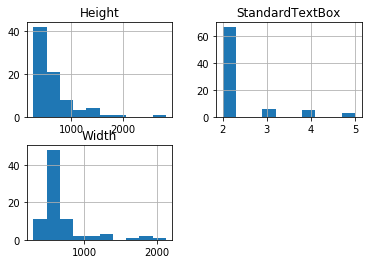

In [3]:
df_meme_reference.hist()
plt.show()

In [4]:
df_meme_data.head()

,AltText,CaptionText,ImageURL,HashId,MemeLabel
0,Drake Hotline Bling | my mom when i play with ...,my mom when i play with my phone for 30 minut...,//i.imgflip.com/3xd5o0.jpg,73c18611930ad390a4a6a7d1cd9214daba85b9f3408997...,Drake Hotline Bling
1,Drake Hotline Bling | Doing your own research ...,Doing your own research for a test Copy and p...,//i.imgflip.com/3xctnx.jpg,0b6d53b7ab91f5260b2ba515b442fbcff55060e346a076...,Drake Hotline Bling
2,"Drake Hotline Bling | 1,000,000 followers on t...","1,000,000 followers on tik tok 1 point on img...",//i.imgflip.com/3wu3bd.jpg,49ebafdd713f94a9db674ed3334b9d126147552f2cc6c6...,Drake Hotline Bling
3,Drake Hotline Bling | Making original memes Fo...,Making original memes Following the idea of a...,//i.imgflip.com/3xb1dj.jpg,6f005a02659a341ce4cb2f68f61160a57264170c04fc4f...,Drake Hotline Bling
4,Drake Hotline Bling | M | image tagged in meme...,M,//i.imgflip.com/3w8qn4.jpg,c1db55fff0979dcb09a710dca8e8c9adc2183d15cd6057...,Drake Hotline Bling


In [5]:
label_find = [
    'Am I The Only One Around Here',
    'Be Like Bill',
    'Change My Mind',
    'Futurama Fry',
    'I Should Buy A Boat Cat',
    'Imagination Spongebob',
    'Is This A Pigeon',
    'Me And The Boys',
    'One Does Not Simply',
    'Put It Somewhere Else Patrick',
    'Spongebob Ight Imma Head Out',
    'That Would Be Great',
    'The Most Interesting Man In The World',
    'Too Damn High',
    'X All The Y',
    'X X Everywhere',
    'Y U No'
]

In [6]:
new_df = df_meme_data.loc[df_meme_data['MemeLabel'].isin(label_find)]

In [7]:
new_df

,AltText,CaptionText,ImageURL,HashId,MemeLabel
7955,Change My Mind | Memes about how people make t...,Memes about how people make too many memes ab...,//i.imgflip.com/3xb1xa.jpg,e87b75a784a3709166552422c9b802b221ffc35bd0d454...,Change My Mind
7956,Let me know if you know somebody both happened...,Nobody can tell whether getting kicked in the...,//i.imgflip.com/3xb9g6.jpg,6508932bf40d0974a3c7f1725614a98057ac722f6cae52...,Change My Mind
7957,No way | Bologna is just hot dog pancakes | im...,Bologna is just hot dog pancakes,//i.imgflip.com/3xaena.jpg,e36073a9c6dc37c2f4141c1c6090c2366c379fc2a01ea9...,Change My Mind
7958,Change My Mind | The three E's in Mercedes are...,The three E's in Mercedes are pronounced diff...,//i.imgflip.com/3x9ea0.jpg,2882fd42201cbb337338229ff25bd95a75f9effcdf3cee...,Change My Mind
7959,Change My Mind | There is no ham in a hamburge...,There is no ham in a hamburger so it should b...,//i.imgflip.com/3wqshf.jpg,f5a605c6f6d7b396a4bafe7439f14cea73346f8cbffa04...,Change My Mind
7960,"Change My Mind | Babies cry when they're born,...","Babies cry when they're born, because they ei...",//i.imgflip.com/3x9zqr.jpg,cc28a6ade53f17fc536cf6efe4cbcb4382b75a1f26dce2...,Change My Mind
7961,Change My Mind | I THINK I MADE MY TEXT TOO BI...,I THINK I MADE MY TEXT TOO BIG,//i.imgflip.com/3wmcug.jpg,1eb56aca78bfdd6134359d101afbc7e91d2392d65683fa...,Change My Mind
7962,Change My Mind | and in the end\r\nmankind use...,and in the end\r\nmankind used so much toilet...,//i.imgflip.com/3wnv3e.jpg,ea667f50a692c6a62430a88cba7b5073a573caaa1c8f59...,Change My Mind
7963,Change My Mind | nobody will upvote this | ima...,nobody will upvote this,//i.imgflip.com/3s17ey.jpg,d7b25585231124854a52424a8cd4d5ebcea589716e0b3d...,Change My Mind
7964,Change My Mind | Coconuts are mammals because ...,Coconuts are mammals because they have fur...,//i.imgflip.com/3w7q6t.jpg,c653b3a1b0e6ff287e6cb95aff26b3d0c32d5a84612ea8...,Change My Mind


In [8]:
X = new_df['CaptionText']
y = new_df['MemeLabel']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [42]:
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])

In [43]:
text_clf.named_steps['tfidf']

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [44]:
text_clf.named_steps['clf']

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [45]:
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [46]:
predictions = text_clf.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [48]:
print(confusion_matrix(y_test, predictions))

[[589   6  15  28   8   7  11   3   6  12  39   6  10   6  27   9  29]
 [  1 657  31  13   3  10  28   2   4   7   2   6  11   0  12   3  16]
 [ 17   8 501  51  33  26  45   4  14  22  18   7  19   4  44  18  16]
 [ 34  11  51 384  17  20  10   4  24  33  46  16  47   6  36  18  42]
 [  5   4  21  18 368   7  11   0   6  12  11  11  12   2  12   5   6]
 [ 12   5  33  14  10 402  11   2   4  15  32   6  13   5  61  26  24]
 [  7   6  16  10   5   7 704   5   1   9  22   1   3   2  10   6  13]
 [  1   0   5   6   1   3   6 386   0   4   9   0   0   1  13   3   5]
 [ 17   3  30  28   6   9  13   1 600  13  11   9  25   4  18  10  11]
 [ 10   4  24  31   4   8  21   3   6 634  11  10  16   0  20  11  31]
 [ 31  10  41  24   3  19  19   4   2  14 315   8  14   3  52  19  37]
 [  9   3   9  20   3   4   7   0   3  14   6 709  18   1  16   6   8]
 [  8   4  31  38   6   6   9   3   8  14  18  10 547   4  18  12  14]
 [  1   2  14   7   4   4   5   1   1   5   1   1   6 780  10   9   3]
 [ 21 

In [49]:
print(classification_report(y_test, predictions))

                                       precision    recall  f1-score   support

        Am I The Only One Around Here       0.74      0.73      0.73       811
                         Be Like Bill       0.89      0.82      0.85       806
                       Change My Mind       0.54      0.59      0.57       847
                         Futurama Fry       0.50      0.48      0.49       799
              I Should Buy A Boat Cat       0.74      0.72      0.73       511
                Imagination Spongebob       0.68      0.60      0.63       675
                     Is This A Pigeon       0.74      0.85      0.79       827
                      Me And The Boys       0.90      0.87      0.89       443
                  One Does Not Simply       0.86      0.74      0.80       808
        Put It Somewhere Else Patrick       0.73      0.75      0.74       844
         Spongebob Ight Imma Head Out       0.49      0.51      0.50       615
                  That Would Be Great       0.86   

In [50]:
human_test = [
    'Am I The Only One Around Here Who Gives a Damn About Corona?',
    'This is Steven, Steven is smart, Be like Steven',
    'Corona Is China Virus, Change My Mind',
    'Not Sure If I Am Squinting or Just Asian',
    'I should buy toiler paper',
    'Is This A Turtle?',
    'Me and the boys during corona times',
    'One does not simply go outside without a mask',
    'lets take bikini bottom, and put it somewhere else',
    'Ight imma head out, wait its corona nevermind',
    'if people would just stay inside, that would be great',
    'i dont usually wear a mask, but when i do its because of corona',
    'the numbers of corona contaminations, is too damn high',
    'buy all the toilet paper',
    'Why You No Stay at Home?',
    'Memes, Memes Everywhere',
    'title of your sextape'
]

text_clf.predict(human_test)

array(['Am I The Only One Around Here', 'X All The Y', 'Change My Mind',
       'Futurama Fry', 'I Should Buy A Boat Cat', 'Is This A Pigeon',
       'Me And The Boys', 'One Does Not Simply',
       'Put It Somewhere Else Patrick', 'Spongebob Ight Imma Head Out',
       'That Would Be Great', 'The Most Interesting Man In The World',
       'Too Damn High', 'X All The Y', 'Y U No', 'X X Everywhere',
       'X X Everywhere'], dtype=object)

In [51]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictions)

0.7146405837602857

In [20]:
joblib.dump(text_clf, 'meme_classifier.sav')

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001C3CF579EE8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001C3CF583318> (for post_execute):


KeyboardInterrupt: 